In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

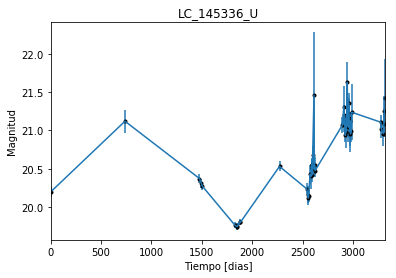

In [2]:
data = np.genfromtxt('LC_145336_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_145336_U')
plt.savefig("LC_145336_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

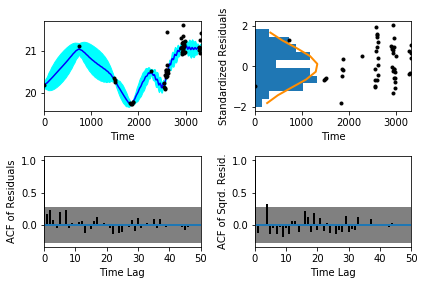

In [26]:
sample.assess_fit()

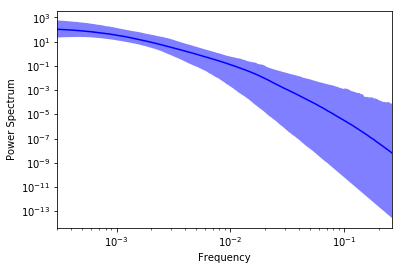

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

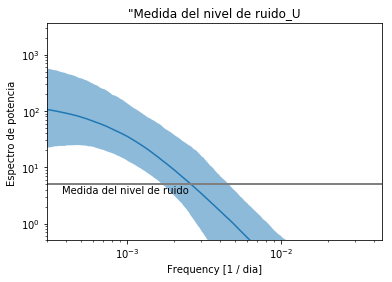

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_145336_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_145336_U')

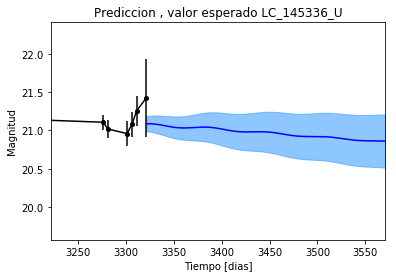

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_145336_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_145336_U')

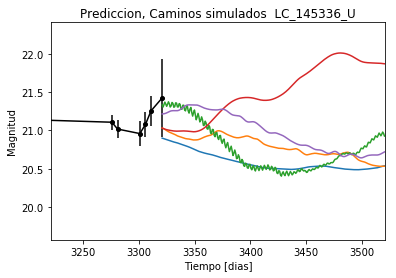

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_145336_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


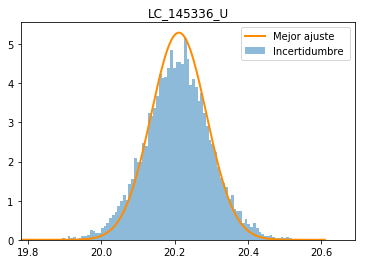

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_145336_U')
plt.savefig("Mejor_ajuste_LC_145336_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_145336_U')

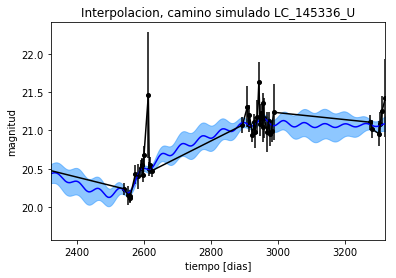

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_145336_U')

Text(0.5,1,'Interpolacion, camino simulado LC_145336_U')

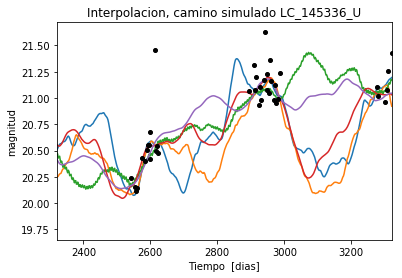

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_145336_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 426.015728342
Median: 0.0147025017193
Standard deviation: 0.120039057209
68% credibility interval: [ 0.00092939  0.17382512]
95% credibility interval: [  3.50753267e-04   4.31323648e-01]
99% credibility interval: [  3.08972283e-04   5.02551378e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 410.590401061
Median: 0.00217958696085
Standard deviation: 0.0456823092298
68% credibility interval: [ 0.00046475  0.02284088]
95% credibility interval: [ 0.00032136  0.13074114]
99% credibility interval: [  3.06974252e-04   3.47072352e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 291.775731696
Median: 0.0134557979407
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1163.85087721
Median: 38.1239400537
Standard deviation: 1.80862884603
68% credibility interval: [ 36.12634602  39.51413959]
95% credibility interval: [ 33.46593991  40.39694251]
99% credibility interval: [ 31.48846917  40.89721771]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 287.205606429
Median: 0.50294939327
Standard deviation: 1.263780584
68% credibility interval: [ 0.05178024  2.42403995]
95% credibility interval: [ 0.01326538  4.36460091]
99% credibility interval: [ 0.00959497  5.87789277]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 454.871046228
Median: 0.205222857821
Standard deviation: 2.65253142208
68% credibility interval: [ 0.01174672  2.83643912]
95% credibility interval: [  1.64123282e-03  

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3466.26435708
Median: 2.04022205645e-28
Standard deviation: 1.12370034835e+64
68% credibility interval: [  4.46240466e-54   6.33253639e-01]
95% credibility interval: [  6.94155658e-70   2.87415807e+43]
99% credibility interval: [  6.71103544e-77   2.02188118e+58]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2444.56474897
Median: 20.5587413392
Standard deviation: 0.236899869451
68% credibility interval: [ 20.37259316  20.76591094]
95% credibility interval: [ 20.08791379  21.04980013]
99% credibility interval: [ 19.85360144  21.28922168]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1188.82433524
Median: 0.00826445728996
Standard deviation: 0.129229601598
68% credibility interval: [ 0.          0.18853749]
95% credibility interval: [ 0.         0.4622718]
99% credibility interval: [ 0.          0.51446739]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1188.82433524
Median: 0.00826445728996
Standard deviation: 0.129229601598
68% credibility interval: [ 0.          0.18853749]
95% credibility interval: [ 0.         0.4622718]
99% credibility interval: [ 0.          0.51446739]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 621.858382928
Median: 0.0
Standard deviation: 0.000360209071087
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1163.85087721
Median: 38.1239400537
Standard deviation: 1.80862884603
68% credibility interval: [ 36.12634602  39.51413959]
95% credibility interval: [ 33.46593991  40.39694251]
99% credibility interval: [ 31.48846917  40.89721771]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1938.7082364
Median: 0.242631053927
Standard deviation: 0.280949745754
68% credibility interval: [ 0.152776    0.43516616]
95% credibility interval: [ 0.10122351  0.94248144]
99% credibility interval: [ 0.08458184  1.86998536]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1705.61651219
Median: 0.888913731108
Standard deviation: 0.15097377382
68% credibility interval: [ 0.75951228  1.04945659]
95% credibility interval: [ 0.65604303  1.24367927]
99% credibility interval: [ 0.59522908  1.40034465]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 240.438530445
Median: 0.000285524572728
Standard deviation: 0.0442144157321
68% credibility interval: [  1.89094093e-06   6.46787343e-03]
95% credibility interval: [  6.13501984e-47   5.35333061e-02]
99% credibility interval: [  9.50084220e-62   2.57006682e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 426.015728342
Median: (-0.0923785427812-0.0559443883237j)
Standard deviation: 1.10822396369
68% credibility interval: [-1.09217541-3.06433514j -0.00583955-0.42280593j]
95% credibility interval: [ -2.71008641e+00+0.j          -2.20384777e-03-0.00290539j]
99% credibility interval: [ -3.15762343e+00+0.j          -1.94133011e-03-0.10272582j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 410.590401061
Median: (-0.0136947487681+1.89203732014j)
Standard deviation: 0.861212795183
68% credibility interval: [-0.14351346+3.03822615j -0.00292012+0.j        ]
95% credibility interval: [-0.82147082+0.5891928j  -0.00201915+0.00316321j]
99% credibility interval: [ -2.18071990e+00+2.75979036j  -1.92877611e-03+0.j        ]
Posterior s